# 1. 인공 신경망의 기본 구조


## 1.1 핵심 구성 요소

인공 신경망은 다음과 같은 핵심 요소들로 구성됩니다.

### a) 입력층 (Input Layer)

- 데이터가 처음 들어오는 곳
- 특성(feature)의 수만큼의 뉴런을 가짐
- 수학적 표현: $\mathbf{x} \in \mathbb{R}^n$

### b) 은닉층 (Hidden Layer)

- 입력 데이터를 변환하는 중간 층
- 비선형 활성화 함수를 통해 복잡한 패턴 학습
- 변환 과정: $\mathbf{h} = f(W\mathbf{x} + \mathbf{b})$

### c) 출력층 (Output Layer)

- 최종 예측/결과를 출력
- 문제 유형에 따라 다른 활성화 함수 사용
- 출력: $\mathbf{y} = g(V\mathbf{h} + \mathbf{c})$

## 1.2 기본 수학적 개념

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=ee62967c4406b96685fb9ec53e66b2e667039fee3c6dfcf8cda41dc5f87f2ed9
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
# 필요한 라이브러리 import
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from torchviz import make_dot

In [ ]:
# 간단한 수학적 예제
x = torch.randn(1, 3)  # 입력 데이터
W = torch.randn(3, 2, requires_grad=True)  # 가중치
b = torch.randn(2, requires_grad=True)  # 편향

# 선형 변환
h = torch.mm(x, W) + b

# 활성화 함수
y = torch.relu(h)

# 계산 그래프 시각화
make_dot(y, params={'W': W, 'b': b}).render("basic_nn", format="png")

'basic_nn.png'

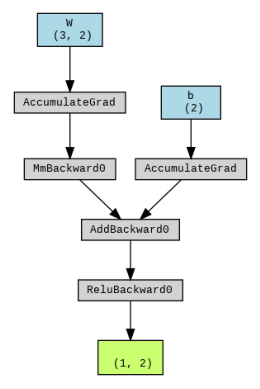

In [ ]:
img = mpimg.imread('basic_nn.png')
imgplot = plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

## 2. PyTorch 구현 방식 비교

### 2.1 Sequential API

Sequential API는 선형적인 층 구조를 쉽게 구현할 수 있게 해줍니다.

In [ ]:
# Sequential API 예제
sequential_model = nn.Sequential(
    nn.Linear(2, 4),    # 입력 차원: 2, 출력 차원: 4
    nn.ReLU(),         # 활성화 함수
    nn.Linear(4, 1)    # 출력층
)

In [ ]:
# 모델 구조 시각화
x = torch.randn(1, 2)
y = sequential_model(x)
make_dot(y, params=dict(sequential_model.named_parameters())).render("sequential_model", format="png")

'sequential_model.png'

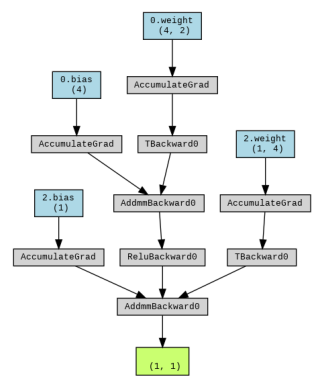

In [ ]:
img = mpimg.imread('sequential_model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

### Sequential API의 특징

- 장점

    - 직관적이고 간단한 구현
    - 코드 가독성이 좋음
    - 빠른 프로토타이핑 가능


- 한계

    - 복잡한 구조 표현 불가
    - 중간 출력 접근 어려움
    - 조건부 실행 불가

### 2.2 Custom API

Custom API를 사용하면 복잡한 신경망 구조를 자유롭게 구현할 수 있습니다.

In [ ]:
class CustomNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        # main Layer 정의
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

        # side Layer 정의
        self.side_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # main 경로
        h = self.layer1(x)
        h_activated = self.activation(h)
        main_output = self.layer2(h_activated)

        # side 경로
        side_output = self.side_layer(h_activated)

        # 결합
        return main_output + side_output

In [ ]:
# 모델 인스턴스 생성
custom_model = CustomNet(2, 4, 1)

# 시각화
x = torch.randn(1, 2)
y = custom_model(x)
make_dot(y, params=dict(custom_model.named_parameters())).render("custom_model", format="png")

'custom_model.png'

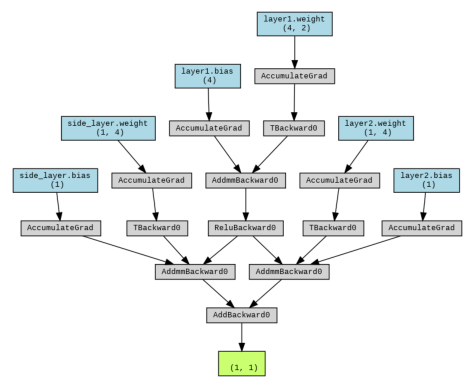

In [ ]:
img = mpimg.imread('custom_model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

### Custom API의 특징

- 장점

    - 복잡한 구조 구현 가능
    - 중간 결과 접근 용이
    - 조건부 로직 구현 가능


- 단점

    - 구현이 더 복잡함
    - 버그 발생 가능성 증가
    - 유지보수에 더 많은 노력 필요

# 3. 실전 예제와 시각화

## 3.1 복잡한 신경망 구조 예제

In [ ]:
class AdvancedNet(nn.Module):
    def __init__(self):
        super().__init__()
        # main
        self.main_path = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 2)
        )

        # side
        self.auxiliary_path = nn.Sequential(
            nn.Linear(2, 3),
            nn.Tanh(),
            nn.Linear(3, 2)
        )

        # output
        self.output_layer = nn.Linear(4, 1)

    def forward(self, x):
        main = self.main_path(x)
        aux = self.auxiliary_path(x)

        combined = torch.cat([main, aux], dim=1)

        return self.output_layer(combined)

In [ ]:
# 모델 생성 및 시각화
advanced_model = AdvancedNet()
x = torch.randn(1, 2)
y = advanced_model(x)
make_dot(y, params=dict(advanced_model.named_parameters())).render("advanced_model", format="png")

'advanced_model.png'

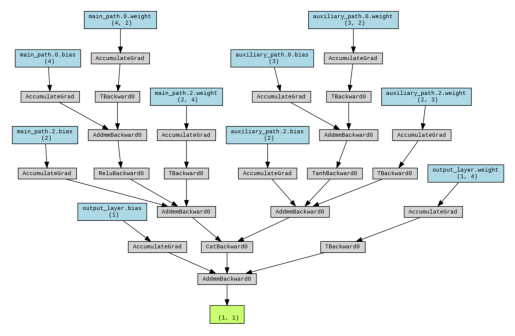

In [ ]:
img = mpimg.imread('advanced_model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

## 3.2 모델 분석과 시각화

In [ ]:
def analyze_model(model, input_size=(1, 2)):
    # 모델 정보 출력
    print("Model Structure:")
    print(model)

    # 파라미터 수 계산
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"\nTotal parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")

    # 메모리 사용량 계산 (대략적)
    memory_bytes = sum(p.numel() * p.element_size() for p in model.parameters())
    print(f"Approximate memory usage: {memory_bytes / 1024 / 1024:.2f} MB")

# 각 모델 분석
print("Sequential Model Analysis:")
analyze_model(sequential_model)
print("\nCustom Model Analysis:")
analyze_model(custom_model)
print("\nAdvanced Model Analysis:")
analyze_model(advanced_model)

Sequential Model Analysis:
Model Structure:
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

Total parameters: 17
Trainable parameters: 17
Approximate memory usage: 0.00 MB

Custom Model Analysis:
Model Structure:
CustomNet(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=4, out_features=1, bias=True)
  (side_layer): Linear(in_features=4, out_features=1, bias=True)
)

Total parameters: 22
Trainable parameters: 22
Approximate memory usage: 0.00 MB

Advanced Model Analysis:
Model Structure:
AdvancedNet(
  (main_path): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=2, bias=True)
  )
  (auxiliary_path): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=2, bias=True)
  )
  (

# 4. 신경망 최적화

## 4.1 모델 최적화

In [ ]:
# 모델 최적화 예제
def optimize_model(model):
    # 데이터 생성
    X = torch.randn(100, 2)
    y = torch.randn(100, 1)

    # 최적화기 설정
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # 학습 루프
    for epoch in range(100):
        # 순전파
        outputs = model(X)
        loss = criterion(outputs, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# 각 모델 최적화
print("Training Sequential Model:")
optimize_model(sequential_model)
print("\nTraining Custom Model:")
optimize_model(custom_model)
print("\nTraining Advanced Model:")
optimize_model(advanced_model)

Training Sequential Model:
Epoch [20/100], Loss: 0.7558
Epoch [40/100], Loss: 0.7338
Epoch [60/100], Loss: 0.7302
Epoch [80/100], Loss: 0.7290
Epoch [100/100], Loss: 0.7289

Training Custom Model:
Epoch [20/100], Loss: 0.8886
Epoch [40/100], Loss: 0.8679
Epoch [60/100], Loss: 0.8465
Epoch [80/100], Loss: 0.8430
Epoch [100/100], Loss: 0.8424

Training Advanced Model:
Epoch [20/100], Loss: 1.1762
Epoch [40/100], Loss: 1.1527
Epoch [60/100], Loss: 1.1070
Epoch [80/100], Loss: 1.0766
Epoch [100/100], Loss: 1.0430


## 4.2 모범 사례와 팁

1. 구조 선택

    - 단순한 구조는 Sequential API 사용
    - 복잡한 구조는 Custom API 사용
    - 필요한 경우 두 방식 혼합 사용


2. 메모리 관리

    - 배치 크기 적절히 조정
    - GPU 메모리 모니터링
    - 불필요한 중간 결과 삭제


3. 디버깅 팁

    - torchviz로 계산 그래프 확인
    - 각 층의 출력 shape 확인
    - gradient 흐름 모니터링